In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
srcImg = plt.imread("./img/lena.jpg")

In [3]:
srcImg.shape

(512, 512, 3)

In [34]:
test_kernel = np.ones([3, 3])
test_kernel = test_kernel * -1
test_kernel[1][1] = 9
test_kernel

array([[-1., -1., -1.],
       [-1.,  9., -1.],
       [-1., -1., -1.]])

array([[1., 1., 1.],
       [1., 9., 1.],
       [1., 1., 1.]])

In [5]:
def generate_dst(img):
    m, n, n_channel = srcImg.shape
    dstImg = np.zeros((m - test_kernel.shape[0] + 1, n - test_kernel.shape[0] + 1, n_channel))
    return dstImg    

In [6]:
def conv_2d(src, kernel, k_size):
    dst = generate_dst(src)
    print(dst.shape)
    conv(src, dst, kernel, k_size)
    return dst

In [7]:
def conv(src, dst, kernel, k_size):
    for i in range(dst.shape[0]):
        for j in range(dst.shape[1]):
            for k in range(dst.shape[2]):
                value  = _con_each(src[i:i + k_size, j:j + k_size,k], kernel)
                dst[i, j, k] = value
            

In [8]:
def _con_each(src, kernel):
    pixel_count = kernel.size
    pixel_sum = 0
    _src = src.flatten()
    _kerenl = kernel.flatten()
    
    for i in range(pixel_count):
        pixel_sum += _src[i] * _kerenl[i]
    value = pixel_sum / pixel_count
    value = value if value > 0 else 0
    value = value if value < 255 else 255
    return value

In [9]:
def test_conv(src, kernel, k_size):
    plt.figure()
    plt.subplot(121)
    plt.imshow(src)
    
    dst = conv_2d(src, kernel, k_size)
    
    plt.subplot(122)
    plt.imshow(dst)
    plt.show()

(510, 510, 3)


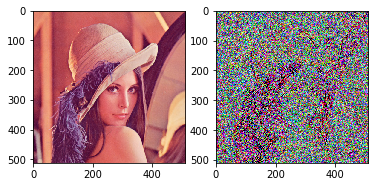

In [35]:
test_conv(srcImg, test_kernel, 3)